<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/Tensor2MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST work w/ Deep Learning w/ Python Text

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


(60000, 784)


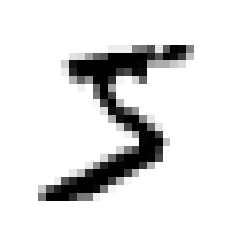

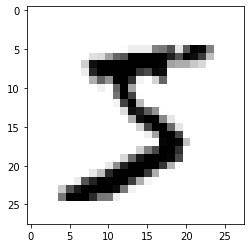

In [ ]:
pI = lambda x: plt.imshow(x, cmap="binary"); plt.show()
print (train_images.shape)
plt.imshow(train_images[0].reshape((28,28)), cmap="binary")
plt.axis("off")
plt.show()

pI(train_images[0].reshape((28,28)))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0234 - accuracy: 0.9940
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0210 - accuracy: 0.9947
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0199 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0193 - accuracy: 0.9953
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0188 - accuracy: 0.9957


1/1 [==============================] - 0s 24ms/step
[[1.9890027e-08 2.0219268e-06 5.7330146e-04 1.8631066e-05 9.9615085e-01
  5.9199600e-08 1.3782191e-06 2.9103882e-03 4.3784781e-05 2.9959841e-04]] (1, 10)
Predict= 4 1.0


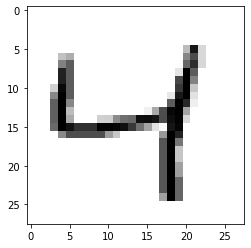

In [ ]:
p_i = 2
p = model.predict(train_images[p_i].reshape(1,28*28))
print (p, p.shape)
print( "Predict=", np.argmax(p), round(p[0,np.argmax(p)],2))
pI(train_images[p_i].reshape((28,28)))

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0607 - accuracy: 0.9818
test_acc: 0.9818000197410583


# Convolutions

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(12, kernel_size=(3,3), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 flatten (Flatten)           (None, 8112)              0         
                                                                 
 dense (Dense)               (None, 10)                81130     
                                                                 
Total params: 81,250
Trainable params: 81,250
Non-trainable params: 0
_________________________________________________________________


In [6]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
modelCNN.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 16s 32ms/step - loss: 0.3359 - accuracy: 0.9104
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1275 - accuracy: 0.9639
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0860 - accuracy: 0.9760
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0672 - accuracy: 0.9807
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0568 - accuracy: 0.9834
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0491 - accuracy: 0.9860
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0439 - accuracy: 0.9872
Epoch 8/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0386 - accuracy: 0.9884
Epoch 9/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 10/10
469/469 [==============================] - 14s 31ms/step - loss: 0.031

In [8]:
test_digits = x_test[0:10]
predictions = modelCNN.predict(test_digits)
print(predictions[0])
print(predictions[0].argmax(), predictions[0][predictions[0].argmax()])
print(test_labels[0])

1/1 [==============================] - 0s 476ms/step
[6.6724360e-12 6.9142220e-11 3.8874798e-08 3.7923837e-05 4.2288972e-13
 4.6212842e-10 9.5891693e-17 9.9996179e-01 7.0429962e-08 1.5385959e-07]
7 0.9999618
7


In [9]:
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0635 - accuracy: 0.9800
test_acc: 0.9800000190734863


# Test 2

In [10]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
modelCNN = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

modelCNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
#modelCNN.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
modelCNN.fit(x_train, y_train, epochs=10, batch_size=128)
#modelCNN.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6870 - accuracy: 0.8297
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3630 - accuracy: 0.9026
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.9118
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.9175
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9201
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.9218
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2741 - accuracy: 0.9236
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2694 - accuracy: 0.9248
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2656 - accuracy: 0.9265
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2627 - accuracy: 0.9269

In [17]:
test_loss, test_acc = modelCNN.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9263
test_acc: 0.9262999892234802


# Few Notes

In [ ]:
test = "12345"
print(f"{test=}")
print(f"{test}, {test=}")

test='12345'
12345, test='12345'
